**PREDICTING HOUSE PRICES USING MACHINE LEARNING**

**DATASET DESCRIPTION**

**DATA SOURCE:**
We obtained our dataset from Kaggle. This dataset
includes essential features such as location, square footage, number of bedrooms and bathrooms, and, most importantly, the house price. Having access to real-world data is essential for training a predictive model.


**DATASET LINK:** https://www.kaggle.com/datasets/vedavyasv/usa-housing

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING THE GIVEN DATASET**

In [ ]:
#Upload the downloaded file from the Kaggle dataset link given here(Before uploading file convert the zip file to csv file using online converter)
from google.colab import files
uploaded=files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [ ]:
data=pd.read_csv("USA_Housing.csv")

In [ ]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


**DATA EXPLORATION**

In [ ]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLak

In [ ]:
print("Last few rows of the dataset:")
print(data.tail())

Last few rows of the dataset:
      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
4995                   USNS Williams\nFPO AP 30153-7

In [ ]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [ ]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [ ]:
print("\nColumns:")
print(data.columns)


Columns:
Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [ ]:
print("\nShape:")
print(data.shape)


Shape:
(5000, 7)


In [ ]:
print("\nDATA TYPES:")
print(data.dtypes)


DATA TYPES:
Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object


In [ ]:
print("\n Access the 21th row (index 20)")
data.iloc[20]


 Access the 21th row (index 20)


Avg. Area Income                                                     86294.999089
Avg. Area House Age                                                      6.627457
Avg. Area Number of Rooms                                                8.011898
Avg. Area Number of Bedrooms                                                 4.07
Area Population                                                      47560.775336
Price                                                              2146925.339889
Address                         030 Larry Park Suite 665\nThomashaven, HI 8794...
Name: 20, dtype: object

In [ ]:
unique_counts = data.nunique()
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64


In [ ]:
nunique_counts = data.nunique()


for column in data.columns:
    unique_values = data[column].unique()
    value_counts = data[column].value_counts()

    print(f"Column: {column}")
    print(f"Number of unique values: {nunique_counts[column]}")
    print(f"Unique values: {unique_values}")
    print(f"Value counts:\n{value_counts}\n")

Column: Avg. Area Income
Number of unique values: 5000
Unique values: [79545.45857432 79248.64245483 61287.06717866 ... 63390.6868855
 68001.33123509 65510.58180367]
Value counts:
79545.458574    1
68735.436608    1
71635.473101    1
73211.136245    1
86249.993070    1
               ..
66064.532823    1
59390.346824    1
64661.930276    1
73279.030904    1
65510.581804    1
Name: Avg. Area Income, Length: 5000, dtype: int64

Column: Avg. Area House Age
Number of unique values: 5000
Unique values: [5.68286132 6.00289981 5.86588984 ... 7.25059061 5.53438842 5.99230531]
Value counts:
5.682861    1
7.721909    1
5.866996    1
6.501139    1
6.155403    1
           ..
6.659562    1
5.664971    1
4.656696    1
5.902296    1
5.992305    1
Name: Avg. Area House Age, Length: 5000, dtype: int64

Column: Avg. Area Number of Rooms
Number of unique values: 5000
Unique values: [7.00918814 6.73082102 8.51272743 ... 4.80508098 7.13014386 6.7923361 ]
Value counts:
7.009188     1
7.621975     1
6.07598

**DATA VISUALIZATION**

<ipython-input-16-63c823b21031>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


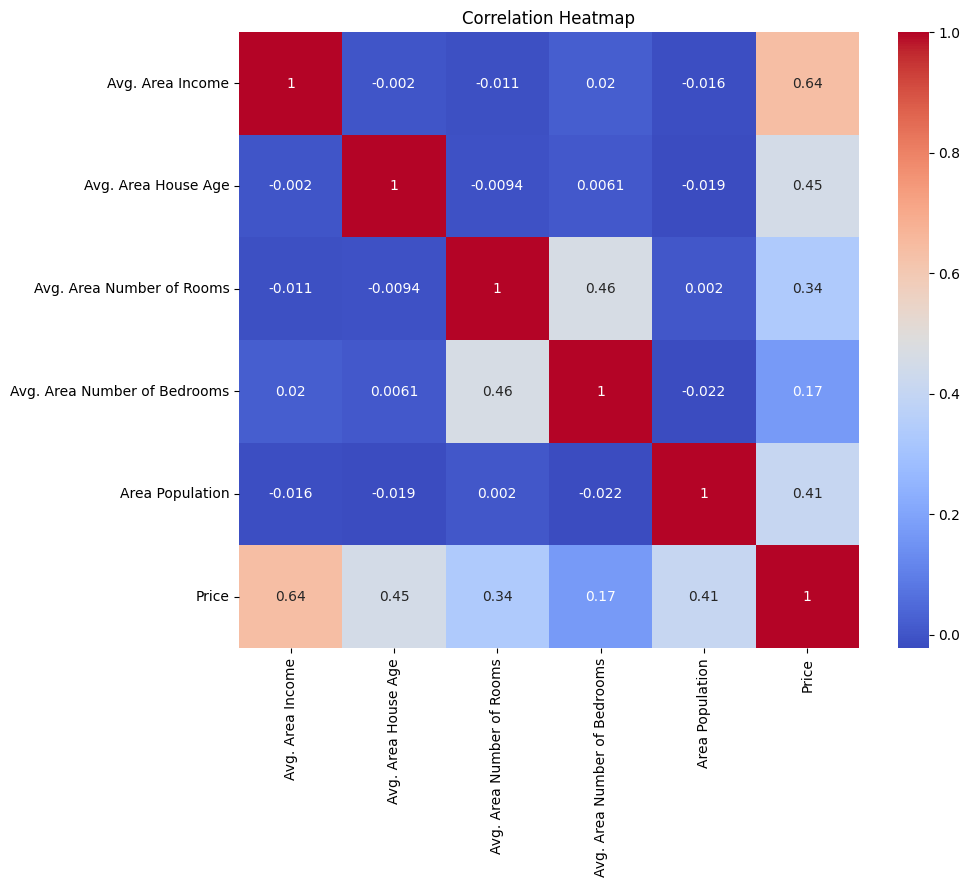

In [ ]:
#Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

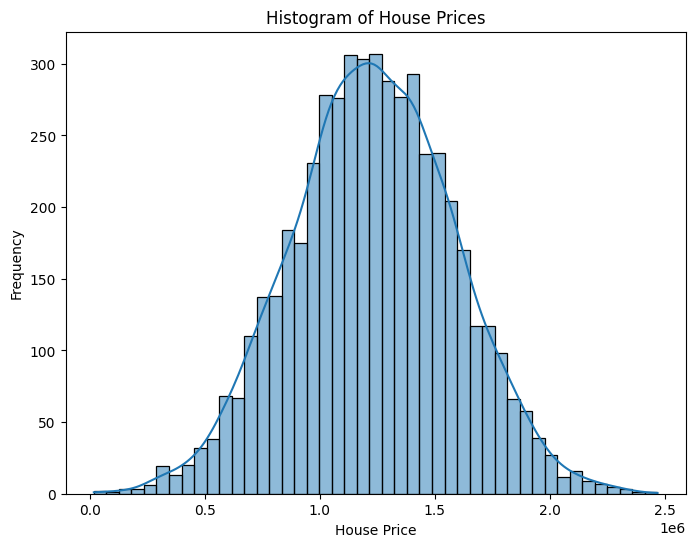

In [ ]:
#Histogram of House Prices
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], kde=True)
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.title("Histogram of House Prices")
plt.show()

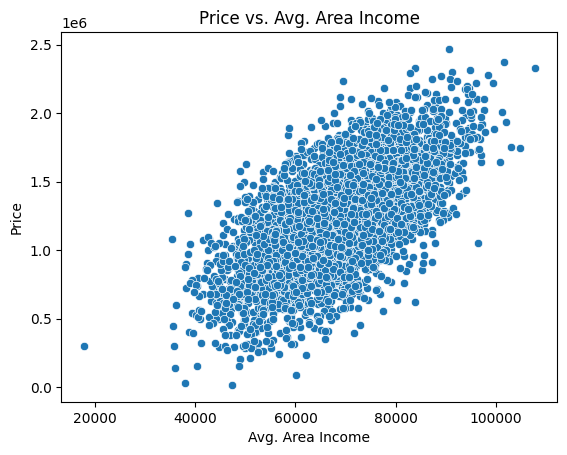

In [ ]:
# Scatter plot of Avg. Area Income vs. Price
sns.scatterplot(x='Avg. Area Income', y='Price', data=data)
plt.title("Price vs. Avg. Area Income")
plt.xlabel("Avg. Area Income")
plt.ylabel("Price")
plt.show()

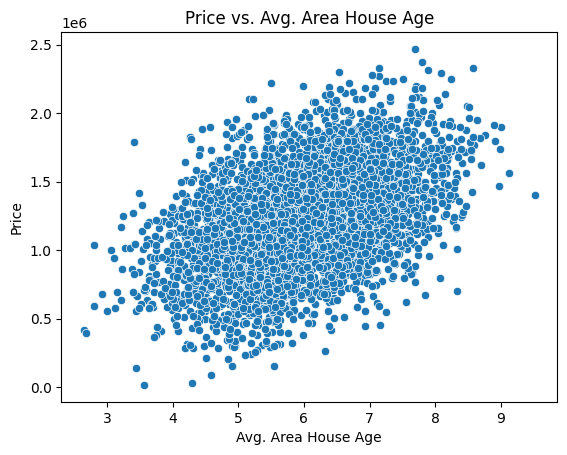

In [ ]:
# Scatter plot of Avg. Area House Age vs. Price
sns.scatterplot(x='Avg. Area House Age', y='Price', data=data)
plt.title("Price vs. Avg. Area House Age")
plt.xlabel("Avg. Area House Age")
plt.ylabel("Price")
plt.show()

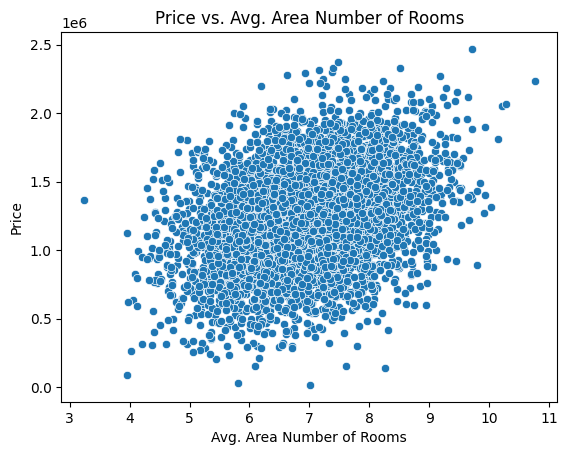

In [ ]:
# Scatter plot of Avg. Area Number of Rooms vs. Price
sns.scatterplot(x='Avg. Area Number of Rooms', y='Price', data=data)
plt.title("Price vs. Avg. Area Number of Rooms")
plt.xlabel("Avg. Area Number of Rooms")
plt.ylabel("Price")
plt.show()

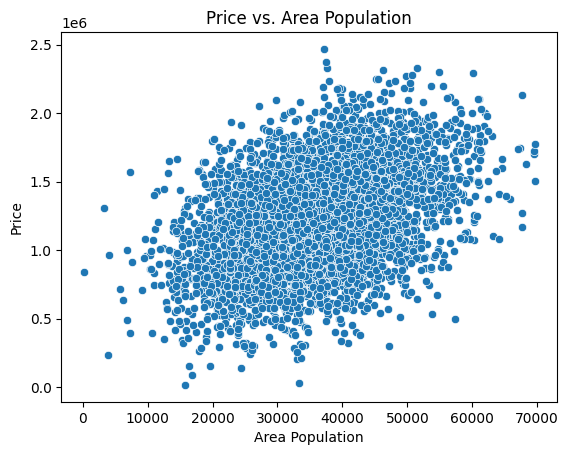

In [ ]:
# Scatter plot of Area Population vs. Price
sns.scatterplot(x='Area Population', y='Price', data=data)
plt.title("Price vs. Area Population")
plt.xlabel("Area Population")
plt.ylabel("Price")
plt.show()

**SPLITTING THE DATASET INTO FEATURES (X) AND TARGET VARIABLE (y)**

In [ ]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

**PREPROCESSING THE DATASET USING MINMAX SCALER**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

**FEATURE SELECTION**

**EXCLUDING THE ADDRESS COLUMN**


In [ ]:
# Excluding the 'Address' column as it is not directly related to the House Prices
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]

**SPLITTING THE DATASET INTO TRAINING AND TESTING SETS**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**SAVING THE TRAIN AND TEST DATASETS**

In [ ]:
# Saving X_train to CSV file
X_train.to_csv("X_train.csv", index=False)

# Saving X_test to CSV file
X_test.to_csv("X_test.csv", index=False)

# Saving y_train to CSV file
y_train.to_csv("y_train.csv", index=False)

# Saving y_test to CSV file
y_test.to_csv("y_test.csv", index=False)

**PREPROCESSING THE DATASET USING STANDARD SCALER**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**CROSS-VALIDATION WITH DIFFERENT PREPROCESSING METHODS AND ALGORITHMS**

In [ ]:
preprocessors = [StandardScaler(), MinMaxScaler()]
algorithms = [LinearRegression(), Ridge()]
for preprocessor in preprocessors:
    for algorithm in algorithms:
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_test_preprocessed = preprocessor.transform(X_test)

        scores = cross_val_score(algorithm, X_train_preprocessed, y_train, cv=5)
        mean_score = scores.mean()
        print(f"Preprocessor: {type(preprocessor).__name__}, Algorithm: {type(algorithm).__name__}, Mean Score: {mean_score}")

Preprocessor: StandardScaler, Algorithm: LinearRegression, Mean Score: 0.9174131909728761
Preprocessor: StandardScaler, Algorithm: Ridge, Mean Score: 0.9174132219499216
Preprocessor: MinMaxScaler, Algorithm: LinearRegression, Mean Score: 0.9174131909728761
Preprocessor: MinMaxScaler, Algorithm: Ridge, Mean Score: 0.9171154717021904


**BUILDING THE MODELS**

**LINEAR REGRESSION MODEL**

In [ ]:
model = LinearRegression()

#Training the model
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict(X_test_preprocessed)

**EVALUATING THE PERFORMANCE**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 10089009300.89399


In [ ]:
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 100444.06055558482


In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute Error:",mae)

Mean absolute Error: 80879.09723489445


In [ ]:
print("Predicted Values:")
print(y_pred)

Predicted Values:
[1308587.92699753 1237037.22949429 1243429.34030687 1228900.21360379
 1063320.9071082  1544058.05034856 1094774.70493022  833284.72339228
  788412.85578724 1469714.86615707  671728.43662066 1606818.21977935
 1004166.61331062 1796798.97595927 1288566.96221017 1087782.93301077
 1423072.37492526 1078178.68169673  802286.03537901  930761.03695714
 1134829.86477819  916398.42023136 1489972.69335423 1284580.15538819
 1582071.3532273  1132519.15991993 1089888.39644513  974510.51872158
  924057.96820669 1740759.72092272 1286481.5951232  1621289.9517161
 1435264.20161716 1234014.77924484 1485434.57300368 1718335.00753687
 1538953.74882846  777106.64791796 1765201.52243617 1175972.1419982
 1553707.94323484  897703.67505177 1371049.80326608  845281.72310359
 1201022.89803883 1133285.98450856 1363128.14557352 1449814.08768269
 1574363.90467353 1233577.50265971 1484464.01606206 1295276.5894355
 1222136.77335287  990124.41659783 1693824.96035767 1823785.05665098
 1136495.63903356 1

In [ ]:
results_df = pd.DataFrame({'Actual Values (y_test)': y_test, 'Predicted Values (y_pred)': y_pred})

print(results_df)

      Actual Values (y_test)  Predicted Values (y_pred)
1501            1.339096e+06               1.308588e+06
2586            1.251794e+06               1.237037e+06
2653            1.340095e+06               1.243429e+06
1055            1.431508e+06               1.228900e+06
705             1.042374e+06               1.063321e+06
...                      ...                        ...
4711            1.107031e+06               1.042903e+06
2313            1.405505e+06               1.318532e+06
3214            1.924156e+06               1.870001e+06
2732            1.571254e+06               1.663624e+06
1926            8.831475e+05               1.045097e+06

[1000 rows x 2 columns]


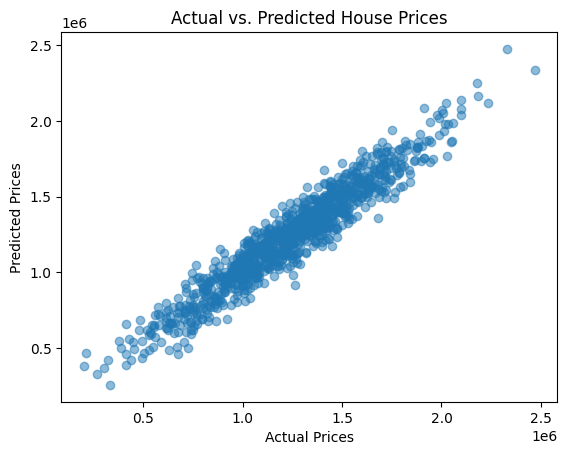

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

**RANDOM FOREST MODEL**

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
#Training the model
model.fit(X_train, y_train)


rany_pred = model.predict(X_test)

**FEATURE IMPORTANCE**

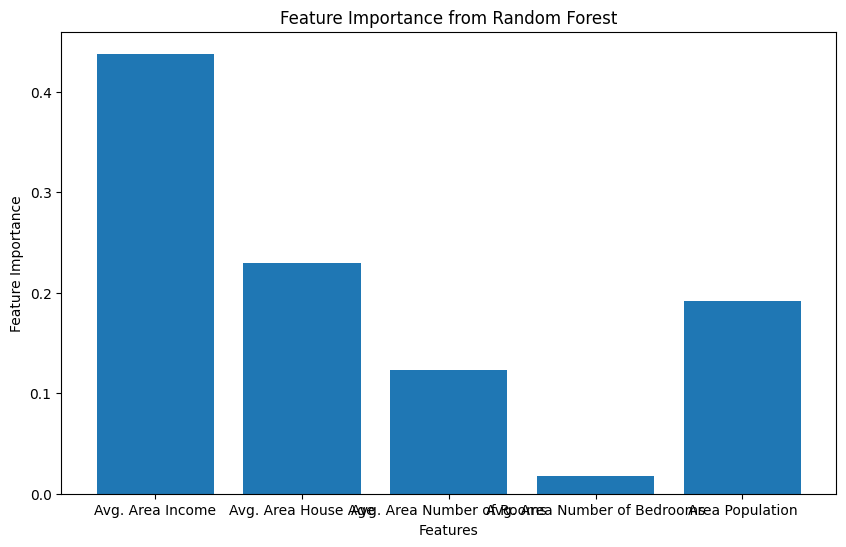

Feature Importances:
Avg. Area Income: 0.4377
Avg. Area House Age: 0.2292
Avg. Area Number of Rooms: 0.1234
Avg. Area Number of Bedrooms: 0.0177
Area Population: 0.1921


In [ ]:
feature_importances = model.feature_importances_

# Creating a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Printing the feature importances
feature_importance_dict = dict(zip(X.columns, feature_importances))
print("Feature Importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance:.4f}")

**EVALUATING THE PERFORMANCE**

In [ ]:
mse = mean_squared_error(y_test, rany_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 14462012668.455772


In [ ]:
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 120258.10853516603


In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,rany_pred)
print("Mean absolute Error:",mae)

Mean absolute Error: 94656.21805566543


In [ ]:
print("Predicted Values:")
print(rany_pred)

Predicted Values:
[1318734.89387169 1246686.25630459 1272179.76633974 1216938.20552752
 1195318.78773162 1529664.54731799 1064923.04889045  843480.24467167
  883841.25914747 1385152.60601265  683179.5560771  1281172.39480503
 1010525.85359916 1686962.58792801 1317771.17975583 1073862.56089725
 1369186.88283805 1106195.21235518  787083.29372044  926799.29775197
 1102660.7509859  1027629.05580758 1501866.98663251 1320508.76180008
 1566151.91507769 1163617.84862547 1067327.87841453 1004508.07253408
  991950.30495689 1703744.62865545 1320766.37631218 1627869.34637791
 1423483.85153336 1239350.55075327 1508566.01255196 1704973.4750561
 1519031.49989179  819627.46672859 1729191.02746194 1143409.01305566
 1485045.23165602  921859.5607307  1403003.00739608  833082.83026552
 1185692.54307605 1141369.96192295 1297517.67438057 1334794.16001823
 1516187.88747729 1247846.3569207  1470373.05954231 1276928.87929276
 1227543.06604849  911872.33385599 1672692.31409497 1820276.88074366
 1083206.00486986

In [ ]:
results_df = pd.DataFrame({'Actual Values (y_test)': y_test, 'Predicted Values (y_pred)': rany_pred})

print(results_df)

      Actual Values (y_test)  Predicted Values (y_pred)
1501            1.339096e+06               1.318735e+06
2586            1.251794e+06               1.246686e+06
2653            1.340095e+06               1.272180e+06
1055            1.431508e+06               1.216938e+06
705             1.042374e+06               1.195319e+06
...                      ...                        ...
4711            1.107031e+06               1.107400e+06
2313            1.405505e+06               1.304310e+06
3214            1.924156e+06               1.882840e+06
2732            1.571254e+06               1.721686e+06
1926            8.831475e+05               1.064801e+06

[1000 rows x 2 columns]


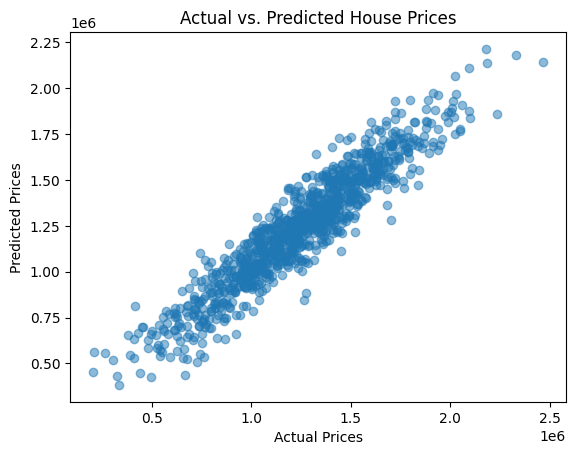

In [ ]:
plt.scatter(y_test, rany_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

**GRADIENT BOOSTING MODEL**

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
#Training the model
model.fit(X_train, y_train)


grady_pred = model.predict(X_test)

**EVALUATING THE PERFORMANCE**

In [ ]:
mse = mean_squared_error(y_test, grady_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 11983338273.93932


In [ ]:
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 109468.43505750559


In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,grady_pred)
print("Mean absolute Error:",mae)

Mean absolute Error: 87417.53256401606


In [ ]:
print("Predicted Values:")
print(grady_pred)

Predicted Values:
[1299546.93648217 1275397.06579869 1250573.57861055 1217924.37830797
 1099409.44598979 1572471.65866559 1075629.75830109  838497.50764465
  829540.04642654 1455103.89339718  706937.1730441  1514803.9105105
  978722.64220612 1761751.70875484 1282928.59088788 1113204.65485405
 1473597.06430574 1109190.67015324  774560.06334126  960263.40690787
 1128946.00175161 1064015.31499033 1429915.57952734 1309936.94354799
 1565272.14583378 1151165.48650021 1060651.83924274 1004056.63932198
  976825.38472945 1725755.16868114 1332872.64806694 1570857.8257909
 1431572.41180677 1215474.6407801  1467122.15519153 1715567.49058808
 1522017.75171553  799243.45318575 1765319.22169731 1175360.70011041
 1644598.15014403  870489.16329986 1363399.36128477  836982.38812705
 1183760.632223   1060503.59905443 1328533.55174162 1442702.91175642
 1565291.98029649 1243769.74460761 1455970.74668065 1275182.28506803
 1173966.76091052 1023279.44197529 1629764.21678061 1812675.03024803
 1136931.18860457 

In [ ]:
results_df = pd.DataFrame({'Actual Values (y_test)': y_test, 'Predicted Values (y_pred)': grady_pred})

print(results_df)

      Actual Values (y_test)  Predicted Values (y_pred)
1501            1.339096e+06               1.299547e+06
2586            1.251794e+06               1.275397e+06
2653            1.340095e+06               1.250574e+06
1055            1.431508e+06               1.217924e+06
705             1.042374e+06               1.099409e+06
...                      ...                        ...
4711            1.107031e+06               1.047987e+06
2313            1.405505e+06               1.269538e+06
3214            1.924156e+06               1.881241e+06
2732            1.571254e+06               1.628147e+06
1926            8.831475e+05               1.106235e+06

[1000 rows x 2 columns]


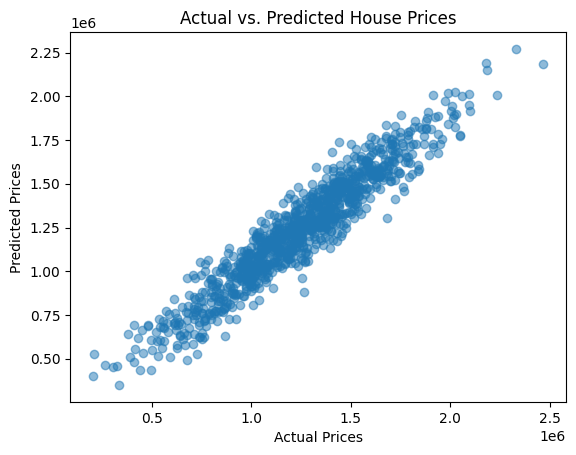

In [ ]:
plt.scatter(y_test, grady_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

**SUPPORT VECTOR REGRESSION MODEL**

In [ ]:
model = SVR(kernel='linear')

#Training the model
model.fit(X_train, y_train)

supy_pred = model.predict(X_test)

**EVALUATING THE PERFORMANCE**

In [ ]:
mse = mean_squared_error(y_test, supy_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 121260874518.99678


In [ ]:
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 348225.3214787758


In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,supy_pred)
print("Mean absolute Error:",mae)

Mean absolute Error: 277020.77862668404


In [ ]:
print("Predicted Values:")
print(supy_pred)

Predicted Values:
[1226234.3255924  1225567.83548121 1225177.88762972 1226049.7127031
 1223764.02563348 1228326.59110897 1224750.05275094 1222473.79084643
 1222193.59968439 1227753.46823249 1221098.29181904 1228350.37330979
 1223917.94606946 1230959.79451711 1226399.45614905 1224787.23636201
 1227725.62149914 1223761.33934579 1221313.93231127 1222941.49151972
 1225108.99100673 1222278.23814822 1227429.26155587 1226546.28620442
 1228679.08709912 1225643.01034023 1224676.15824975 1223679.33524301
 1223492.72662071 1231365.82831769 1225702.88938158 1228962.81275882
 1228609.02567249 1226971.52691643 1227434.26757876 1229908.33438048
 1228297.99254171 1222986.05486976 1231509.86919437 1225572.28800049
 1228298.57819563 1223119.79933932 1227182.03165391 1222146.01514423
 1225791.95286012 1225190.61586813 1228030.45023713 1226979.91268397
 1229852.19307541 1226012.51866312 1228125.53637168 1226049.72405527
 1225528.09896723 1223395.87279934 1230186.87470995 1230820.04643014
 1224323.94475355

In [ ]:
results_df = pd.DataFrame({'Actual Values (y_test)': y_test, 'Predicted Values (y_pred)': supy_pred})

print(results_df)

      Actual Values (y_test)  Predicted Values (y_pred)
1501            1.339096e+06               1.226234e+06
2586            1.251794e+06               1.225568e+06
2653            1.340095e+06               1.225178e+06
1055            1.431508e+06               1.226050e+06
705             1.042374e+06               1.223764e+06
...                      ...                        ...
4711            1.107031e+06               1.225212e+06
2313            1.405505e+06               1.225938e+06
3214            1.924156e+06               1.232096e+06
2732            1.571254e+06               1.228822e+06
1926            8.831475e+05               1.224745e+06

[1000 rows x 2 columns]


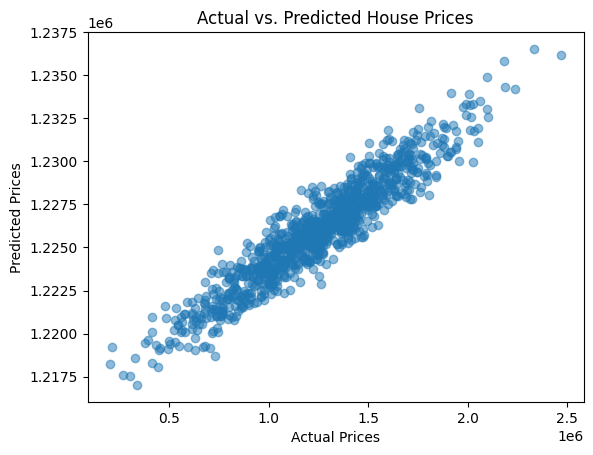

In [ ]:
plt.scatter(y_test, supy_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()